In [66]:
import xgboost as xgb
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [163]:
d = 'train'
data = pd.read_csv(f'../derivedData/{d}_cleaned.csv')
data['logSalePrice'] = np.log(data['SalePrice'])

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## XGB-Boost

In [164]:
kf = KFold(n_splits=4, shuffle=True)

xgb_model = xgb.XGBRFRegressor(random_state=10)

# Simulation of nb_forest independent xgb random forests (increase it at your own risk)
nb_forest = 1

lambda_range = np.linspace(1e-3, 1, 10)

lambda_train_score = []
lambda_test_score = []

for lambda_ in lambda_range:
    # Model score
    train_score = 0
    test_score = 0
    
    for _ in range(0,nb_forest):

        # Reg_lambda is the L2 regularization
        xgb_model.set_params(reg_lambda = lambda_)

        # scores per random forest
        train_score_rf = 0
        test_score_rf = 0

        for train_index, test_index in kf.split(X, y) :
            xgb_model.fit(X.iloc[train_index,:], y[train_index])
            train_score_rf = train_score_rf + xgb_model.score(X.iloc[train_index,:], y[train_index])
            test_score_rf = test_score_rf + xgb_model.score(X.iloc[test_index,:], y[test_index])
        train_score_rf = train_score_rf/kf.n_splits
        test_score_rf = test_score_rf/kf.n_splits

        # Averaging accuracy of each RF
        train_score = train_score + train_score_rf
        test_score = test_score + test_score_rf
    
    
    # Average accuracy of the model
    train_score = train_score/nb_forest
    test_score = test_score/nb_forest
    
    # Storing score per lambda
    lambda_train_score.append(train_score_rf)
    lambda_test_score.append(test_score_rf)

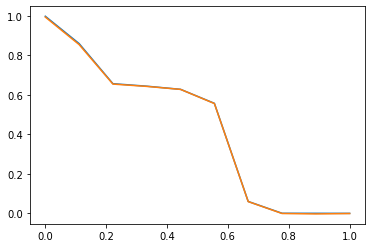

In [165]:
plt.plot(lambda_range, lambda_train_score)
plt.plot(lambda_range, lambda_test_score)

Setting reg_lambda to 10 should reduce overfitting

In [160]:
# Model score
train_score = 0
test_score = 0

for _ in range(0,nb_forest):

    # Reg_lambda is the L2 regularization
    xgb_model.set_params(reg_lambda = 0)

    # scores per random forest
    train_score_rf = 0
    test_score_rf = 0

    for train_index, test_index in kf.split(X, y) :
        xgb_model.fit(X.iloc[train_index,:], y[train_index])
        train_score_rf = train_score_rf + xgb_model.score(X.iloc[train_index,:], y[train_index])
        test_score_rf = test_score_rf + xgb_model.score(X.iloc[test_index,:], y[test_index])
    train_score_rf = train_score_rf/kf.n_splits
    test_score_rf = test_score_rf/kf.n_splits

    # Averaging accuracy of each RF
    train_score = train_score + train_score_rf
    test_score = test_score + test_score_rf


# Average accuracy of the model
train_score = train_score/nb_forest
test_score = test_score/nb_forest

print(f'Train score is {train_score}')
print(f'Test score is {test_score}')

Train score is 0.9995491252165036
Test score is 0.9968289657600119
